<a href="https://colab.research.google.com/github/gongbububu/gongbububu/blob/main/crack_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crack area ratio: 0.25%


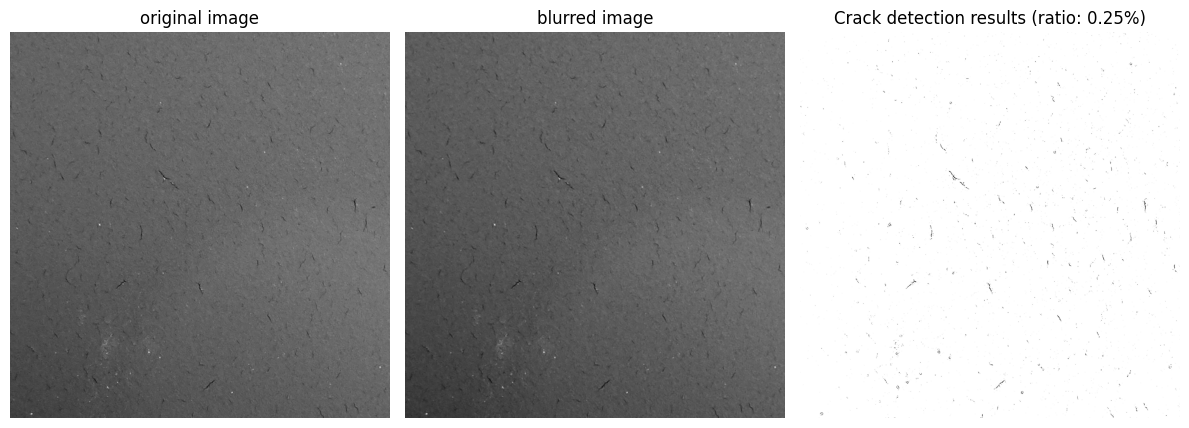

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 로드
image_path = "/content/440_11_origin.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 그레이스케일로 로드

# 2. 지역 평균 계산 (가우시안 블러 적용)
# 주위 픽셀들의 평균값을 계산 (커널 크기를 조정하여 민감도 조절 가능)
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# 3. 밝기 차이를 기반으로 크랙 감지
# 원본 이미지보다 블러링된 이미지가 더 밝은 경우를 검출
dark_regions = image < (blurred - 4)  # 밝기 차이 임계값 (-10) 조정 가능
mask = np.uint8(dark_regions) * 255  # True/False를 0~255 값으로 변환

# 4. 크랙 감지 결과를 흰 배경에 검정 크랙으로 변환
# mask 값을 반전시켜서 흰 배경에 검정 크랙으로 만듬
crack_image = cv2.bitwise_not(mask)

# 5. 크랙 면적 비율 계산
crack_area = np.sum(crack_image == 0)  # 크랙(검정) 픽셀 수
total_area = crack_image.size          # 전체 픽셀 수
crack_ratio = (crack_area / total_area) * 100

# 6. 결과 출력
print(f"Crack area ratio: {crack_ratio:.2f}%")

# 7. 결과 시각화
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("original image")
plt.axis("off")

# 블러링된 이미지
plt.subplot(1, 3, 2)
plt.imshow(blurred, cmap="gray")
plt.title("blurred image")
plt.axis("off")

# 크랙 감지 이미지 (흰 배경에 검정 크랙)
plt.subplot(1, 3, 3)
plt.imshow(crack_image, cmap="gray")
plt.title(f"Crack detection results (ratio: {crack_ratio:.2f}%)")
plt.axis("off")

plt.tight_layout()
plt.show()

crack area ratio: 0.15%


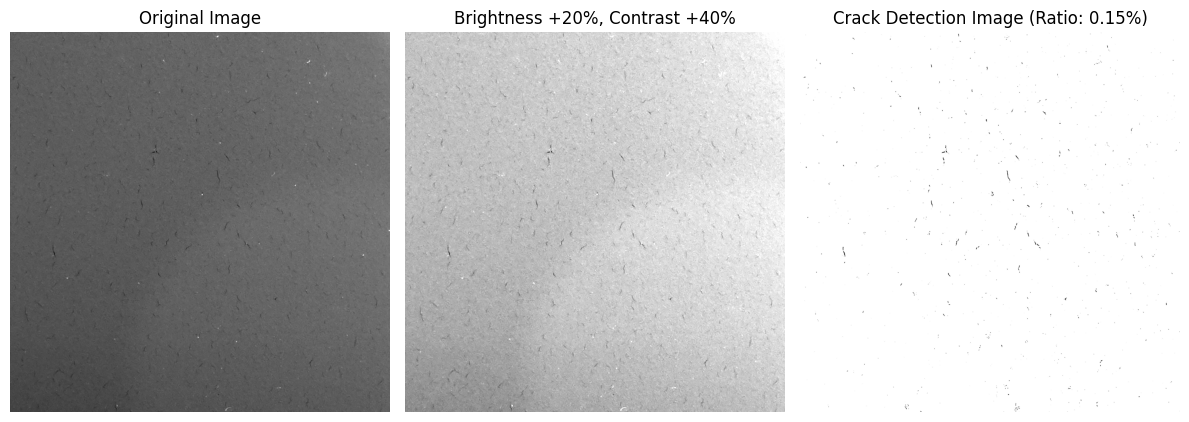

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 로드
image_path = "/content/440_11_dry.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 그레이스케일로 로드

# 2. 밝기 및 대비 조정
# 밝기 +20% (밝기 조정)
brightness_factor = 1.2
bright_image = cv2.convertScaleAbs(image, alpha=1, beta=int(255 * (brightness_factor - 1)))  # 알파(대비) 1, 베타(밝기)

# 대비 +40% (대비 조정)
contrast_factor = 1.3
contrast_image = cv2.convertScaleAbs(bright_image, alpha=contrast_factor, beta=0)  # alpha: 대비, beta: 밝기

# 3. 지역 평균 계산 (가우시안 블러 적용)
blurred = cv2.GaussianBlur(contrast_image, (23, 23), 0)

# 4. 밝기 차이를 기반으로 크랙 감지
dark_regions = contrast_image < (blurred - 12)  # 밝기 차이 임계값 (-4) 조정 가능
mask = np.uint8(dark_regions) * 255  # True/False를 0~255 값으로 변환

# 5. 크랙 감지 이미지 생성 (크랙 영역을 검정색으로 표시하고 나머지 영역은 흰색)
crack_image = np.ones_like(mask) * 255  # 전체를 흰색으로 초기화
crack_image[mask == 255] = 0  # 크랙으로 감지된 부분은 검정색으로 설정

# 6. 크랙 면적 비율 계산
crack_area = np.sum(crack_image == 0)  # 크랙(검정) 픽셀 수
total_area = crack_image.size          # 전체 픽셀 수
crack_ratio = (crack_area / total_area) * 100

# 7. 결과 출력
print(f"crack area ratio: {crack_ratio:.2f}%")

# 8. 결과 시각화
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# 밝기 및 대비 조정된 이미지
plt.subplot(1, 3, 2)
plt.imshow(contrast_image, cmap="gray")
plt.title("Brightness +20%, Contrast +40%")
plt.axis("off")

# 크랙 감지 이미지 (흰 배경에 검정 크랙)
plt.subplot(1, 3, 3)
plt.imshow(crack_image, cmap="gray")
plt.title(f"Crack Detection Image (Ratio: {crack_ratio:.2f}%)")
plt.axis("off")

plt.tight_layout()
plt.show()


crack area ratio: 0.43%


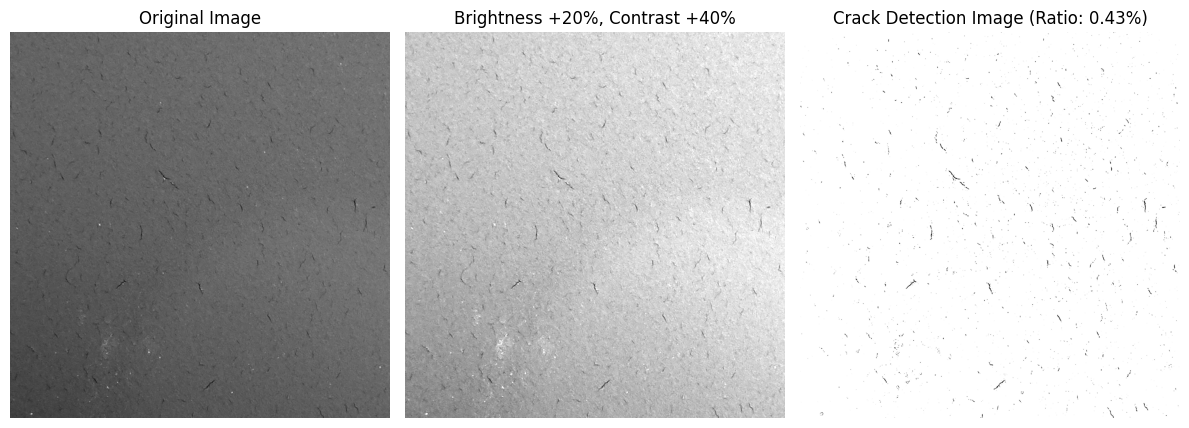

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 로드
image_path = "/content/440_11_origin.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 그레이스케일로 로드

# 2. 밝기 및 대비 조정
# 밝기 +20% (밝기 조정)
brightness_factor = 1.2
bright_image = cv2.convertScaleAbs(image, alpha=1, beta=int(255 * (brightness_factor - 1)))  # 알파(대비) 1, 베타(밝기)

# 대비 +40% (대비 조정)
contrast_factor = 1.3
contrast_image = cv2.convertScaleAbs(bright_image, alpha=contrast_factor, beta=0)  # alpha: 대비, beta: 밝기

# 3. 지역 평균 계산 (가우시안 블러 적용)
blurred = cv2.GaussianBlur(contrast_image, (23, 23), 0)

# 4. 밝기 차이를 기반으로 크랙 감지
dark_regions = contrast_image < (blurred - 12)  # 밝기 차이 임계값 (-4) 조정 가능
mask = np.uint8(dark_regions) * 255  # True/False를 0~255 값으로 변환

# 5. 크랙 감지 이미지 생성 (크랙 영역을 검정색으로 표시하고 나머지 영역은 흰색)
crack_image = np.ones_like(mask) * 255  # 전체를 흰색으로 초기화
crack_image[mask == 255] = 0  # 크랙으로 감지된 부분은 검정색으로 설정

# 6. 크랙 면적 비율 계산
crack_area = np.sum(crack_image == 0)  # 크랙(검정) 픽셀 수
total_area = crack_image.size          # 전체 픽셀 수
crack_ratio = (crack_area / total_area) * 100

# 7. 결과 출력
print(f"crack area ratio: {crack_ratio:.2f}%")

# 8. 결과 시각화
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# 밝기 및 대비 조정된 이미지
plt.subplot(1, 3, 2)
plt.imshow(contrast_image, cmap="gray")
plt.title("Brightness +20%, Contrast +40%")
plt.axis("off")

# 크랙 감지 이미지 (흰 배경에 검정 크랙)
plt.subplot(1, 3, 3)
plt.imshow(crack_image, cmap="gray")
plt.title(f"Crack Detection Image (Ratio: {crack_ratio:.2f}%)")
plt.axis("off")

plt.tight_layout()
plt.show()
